In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [5]:
data = load_iris()

In [15]:
x, y = data.data , data.target

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
para_grid = {
    'n_estimators':[10,50,100], 
    'max_depth' : [None,10,20],
    'min_samples_split':[2,5,10] 
}

In [25]:
rf = RandomForestClassifier(random_state=42)

In [29]:
grid_search = GridSearchCV(rf,para_grid,cv=5,scoring='accuracy')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [31]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [33]:
best_rf = grid_search.best_estimator_

In [37]:
print(f"Test Accuracy: {best_rf.score(xtest, ytest):.3f}")

Test Accuracy: 1.000


In [47]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [49]:
rf.feature_importances_

array([0.10809762, 0.03038681, 0.43999397, 0.42152159])

In [51]:
importances = rf.feature_importances_

In [53]:
importances

array([0.10809762, 0.03038681, 0.43999397, 0.42152159])

In [55]:
import pandas as pd

In [63]:
feature_names = data.feature_names

In [65]:
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

In [69]:
print(importances_df)

             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


In [71]:
import matplotlib.pyplot as plt

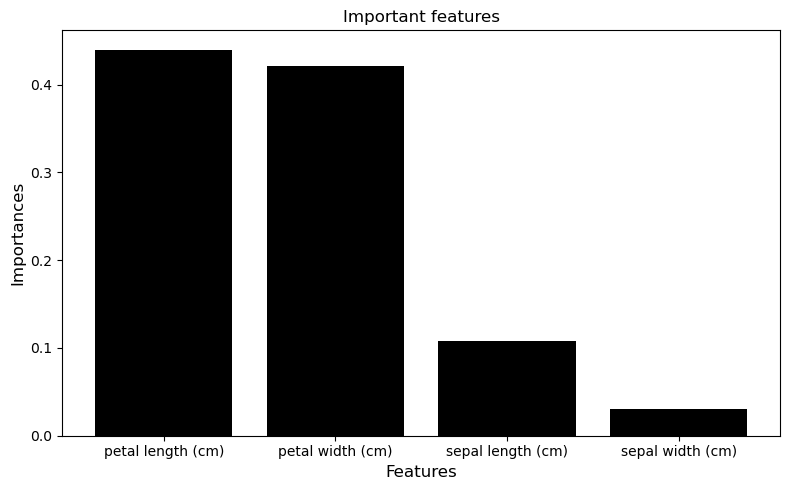

In [89]:
plt.figure(figsize=(8,5))
plt.bar(importances_df['Feature'],importances_df['Importance'], color ='black')
plt.title('Important features'); 
plt.xlabel ('Features',fontsize=12)
plt.ylabel ('Importances',fontsize=12)
plt.tight_layout()
plt.show()